#Multilayered, ODE
#Simple exponential equation

Initial cost: 309.98
Final cost: 0.00138556


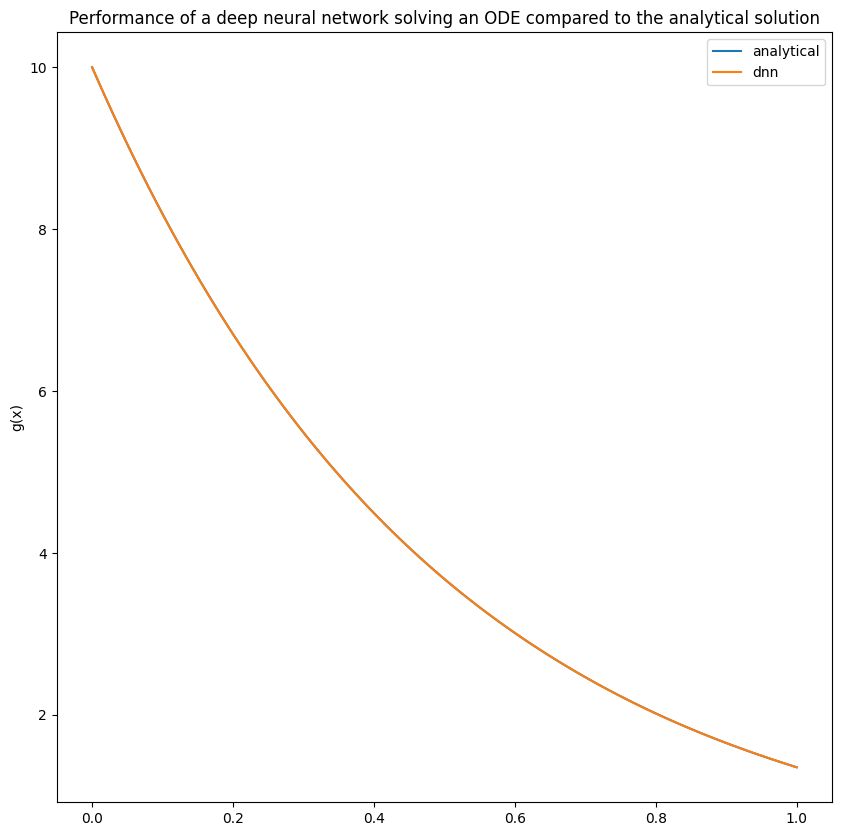

In [ ]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1/(1 + np.exp(-z))

# The neural network with one input layer and one output layer,
# but with number of hidden layers specified by the user.
def deep_neural_network(deep_params, x):
    # N_hidden is the number of hidden layers

    N_hidden = len(deep_params) - 1 # -1 since params consists of parameters to all the hidden layers AND the output layer.

    # Assumes input x being an one-dimensional array
    num_values = np.size(x)
    x = x.reshape(-1, num_values)

    # Assume that the input layer does nothing to the input x
    x_input = x

    # Due to multiple hidden layers, define a variable referencing to the output of the previous layer:
    x_prev = x_input

    ## Hidden layers:
    for l in range(N_hidden):
        # From the list of parameters P; find the correct weigths and bias for this layer
        w_hidden = deep_params[l]

        # Add a row of ones to include bias
        x_prev = np.concatenate((np.ones((1,num_values)), x_prev ), axis = 0)

        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)

        # Update x_prev such that next layer can use the output from this layer
        x_prev = x_hidden

    ## Output layer:
    # Get the weights and bias for this layer
    w_output = deep_params[-1]

    # Include bias:
    x_prev = np.concatenate((np.ones((1,num_values)), x_prev), axis = 0)

    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output

# The trial solution using the deep neural network:
def g_trial_deep(x,params, g0 = 10):
    return g0 + x*deep_neural_network(params, x)

# The right side of the ODE:
def g(x, g_trial, gamma = 2):
    return -gamma*g_trial

# The same cost function as before, but calls deep_neural_network instead.
def cost_function_deep(P, x):

    # Evaluate the trial function with the current parameters P
    g_t = g_trial_deep(x,P)

    # Find the derivative w.r.t x of the neural network
    d_net_out = elementwise_grad(deep_neural_network,1)(P,x)

    # Find the derivative w.r.t x of the trial function
    d_g_t = elementwise_grad(g_trial_deep,0)(x,P)

    # The right side of the ODE
    func = g(x, g_t)

    err_sqr = (d_g_t - func)**2
    cost_sum = np.sum(err_sqr)

    return cost_sum / np.size(err_sqr)

# Solve the exponential decay ODE using neural network with one input and one output layer,
# but with specified number of hidden layers from the user.
def solve_ode_deep_neural_network(x, num_neurons, num_iter, lmb):
    # num_hidden_neurons is now a list of number of neurons within each hidden layer
    # The number of elements in the list num_hidden_neurons thus represents the number of hidden layers.

    # Find the number of hidden layers:
    N_hidden = np.size(num_neurons)

    ## Set up initial weights and biases
    # Initialize the list of parameters:
    P = [None]*(N_hidden + 1) # + 1 to include the output layer

    P[0] = npr.randn(num_neurons[0], 2 )
    for l in range(1,N_hidden):
        P[l] = npr.randn(num_neurons[l], num_neurons[l-1] + 1) # +1 to include bias

    # For the output layer
    P[-1] = npr.randn(1, num_neurons[-1] + 1 ) # +1 since bias is included

    print('Initial cost: %g'%cost_function_deep(P, x))

    cost_function_deep_grad = grad(cost_function_deep,0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        # Evaluate the gradient at the current weights and biases in P.
        # The cost_grad consist now of N_hidden + 1 arrays; the gradient w.r.t the weights and biases in the hidden layers and output layers evaluated at x.
        cost_deep_grad =  cost_function_deep_grad(P, x)

        # Optimization Part
        for l in range(N_hidden+1):
            P[l] = P[l] - lmb * cost_deep_grad[l]

    print('Final cost: %g'%cost_function_deep(P, x))

    return P

def g_analytic(x, gamma = 2, g0 = 10):
    return g0*np.exp(-gamma*x)

# Solve the given problem
if __name__ == '__main__':
    npr.seed(15)

    ## Decide the vales of arguments to the function to solve
    N = 100
    x = np.linspace(0, 1, N,dtype=np.float64)

    ## Set up the initial parameters
    num_hidden_neurons = np.array([25,15], dtype=np.int32)
    num_iter = 10000
    lmb = np.float64(0.01)

    P = solve_ode_deep_neural_network(x, num_hidden_neurons, num_iter, lmb)

    res = g_trial_deep(x,P)
    res_analytical = g_analytic(x)

    plt.figure(figsize=(10,10))

    plt.title('Performance of a deep neural network solving an ODE compared to the analytical solution')
    plt.plot(x, res_analytical)
    plt.plot(x, res[0,:])
    plt.legend(['analytical','dnn'])
    plt.ylabel('g(x)')
    plt.show()

# Checking Adam

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3202: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size


Initial cost: 309.98
Final cost: 2.76231e-05


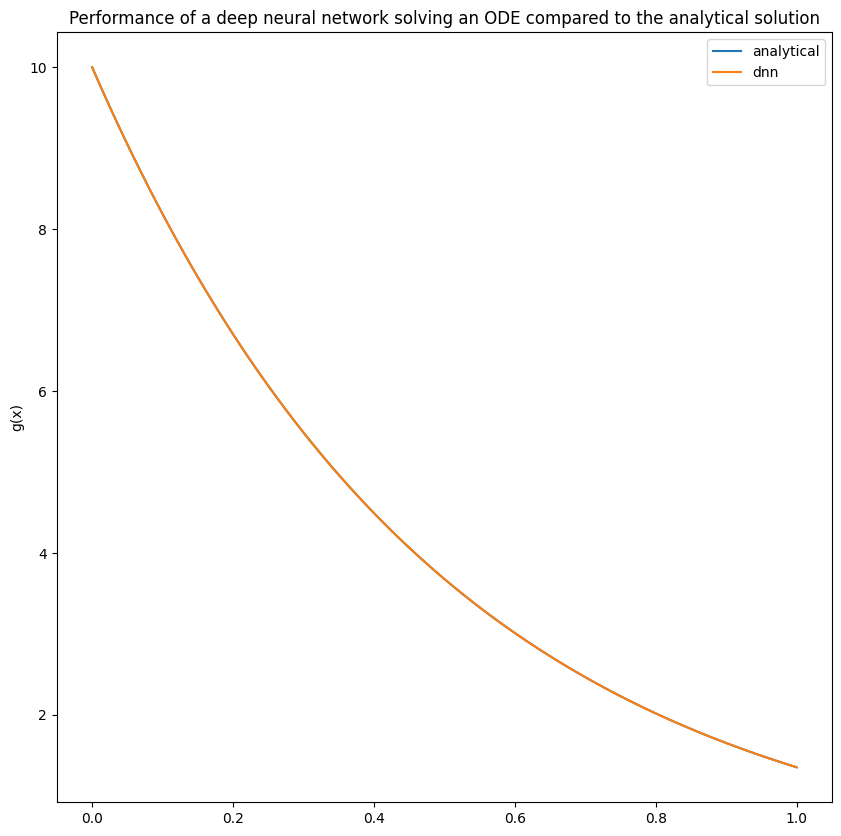

In [ ]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def deep_neural_network(deep_params, x):
    N_hidden = len(deep_params) - 1
    num_values = np.size(x)
    x = x.reshape(-1, num_values)
    x_input = x
    x_prev = x_input

    for l in range(N_hidden):
        w_hidden = deep_params[l]
        x_prev = np.concatenate((np.ones((1, num_values)), x_prev), axis=0)
        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)
        x_prev = x_hidden

    w_output = deep_params[-1]
    x_prev = np.concatenate((np.ones((1, num_values)), x_prev), axis=0)
    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output

def g_trial_deep(x, params, g0=10):
    return g0 + x * deep_neural_network(params, x)

def g(x, g_trial, gamma=2):
    return -gamma * g_trial

def cost_function_deep(P, x):
    g_t = g_trial_deep(x, P)
    d_net_out = elementwise_grad(deep_neural_network, 1)(P, x)
    d_g_t = elementwise_grad(g_trial_deep, 0)(x, P)
    func = g(x, g_t)
    err_sqr = (d_g_t - func)**2
    cost_sum = np.sum(err_sqr)
    return cost_sum / np.size(err_sqr)

def solve_ode_deep_neural_network(x, num_neurons, num_iter, lmb, alpha=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    N_hidden = np.size(num_neurons)
    P = [None] * (N_hidden + 1)

    P[0] = np.random.randn(num_neurons[0], 2)
    for l in range(1, N_hidden):
        P[l] = np.random.randn(num_neurons[l], num_neurons[l-1] + 1)

    P[-1] = np.random.randn(1, num_neurons[-1] + 1)

    print('Initial cost: %g' % cost_function_deep(P, x))

    m = [np.zeros_like(param) for param in P]
    v = [np.zeros_like(param) for param in P]
    t = 0

    for i in range(num_iter):
        t += 1
        cost_deep_grad = grad(cost_function_deep, 0)(P, x)

        for l in range(N_hidden + 1):
            m[l] = beta1 * m[l] + (1 - beta1) * cost_deep_grad[l]
            v[l] = beta2 * v[l] + (1 - beta2) * (cost_deep_grad[l]**2)

            m_hat = m[l] / (1 - beta1**t)
            v_hat = v[l] / (1 - beta2**t)

            P[l] = P[l] - lmb * m_hat / (np.sqrt(v_hat) + epsilon)

    print('Final cost: %g' % cost_function_deep(P, x))

    return P

def g_analytic(x, gamma=2, g0=10):
    return g0 * np.exp(-gamma * x)

if __name__ == '__main__':
    np.random.seed(15)

    N = 100
    x = np.linspace(0, 1, N, dtype=np.float64)

    num_hidden_neurons = np.array([25, 15], dtype=np.int32)
    num_iter = 10000
    lmb = np.float64(0.01)

    P = solve_ode_deep_neural_network(x, num_hidden_neurons, num_iter, lmb)

    res = g_trial_deep(x, P)
    res_analytical = g_analytic(x)

    plt.figure(figsize=(10, 10))
    plt.title('Performance of a deep neural network solving an ODE compared to the analytical solution')
    plt.plot(x, res_analytical)
    plt.plot(x, res[0, :])
    plt.legend(['analytical', 'dnn'])
    plt.ylabel('g(x)')
    plt.show()

# Ada Grad

Initial cost: 309.98
Final cost: 2.88001


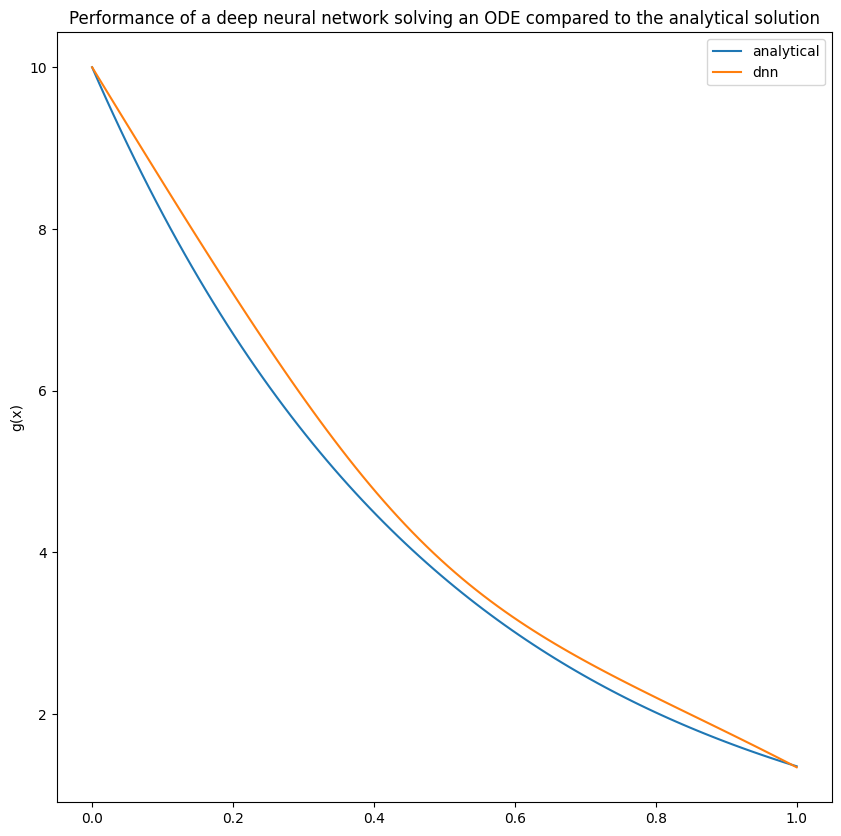

In [ ]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def deep_neural_network(deep_params, x):
    N_hidden = len(deep_params) - 1
    num_values = np.size(x)
    x = x.reshape(-1, num_values)
    x_input = x
    x_prev = x_input

    for l in range(N_hidden):
        w_hidden = deep_params[l]
        x_prev = np.concatenate((np.ones((1, num_values)), x_prev), axis=0)
        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)
        x_prev = x_hidden

    w_output = deep_params[-1]
    x_prev = np.concatenate((np.ones((1, num_values)), x_prev), axis=0)
    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output

def g_trial_deep(x, params, g0=10):
    return g0 + x * deep_neural_network(params, x)

def g(x, g_trial, gamma=2):
    return -gamma * g_trial

def cost_function_deep(P, x):
    g_t = g_trial_deep(x, P)
    d_net_out = elementwise_grad(deep_neural_network, 1)(P, x)
    d_g_t = elementwise_grad(g_trial_deep, 0)(x, P)
    func = g(x, g_t)
    err_sqr = (d_g_t - func)**2
    cost_sum = np.sum(err_sqr)
    return cost_sum / np.size(err_sqr)

def solve_ode_deep_neural_network(x, num_neurons, num_iter, lmb, epsilon=1e-8):
    N_hidden = np.size(num_neurons)
    P = [None] * (N_hidden + 1)

    P[0] = np.random.randn(num_neurons[0], 2)
    for l in range(1, N_hidden):
        P[l] = np.random.randn(num_neurons[l], num_neurons[l-1] + 1)

    P[-1] = np.random.randn(1, num_neurons[-1] + 1)

    print('Initial cost: %g' % cost_function_deep(P, x))

    G_sq = [np.zeros_like(param) for param in P]

    for i in range(num_iter):
        cost_deep_grad = grad(cost_function_deep, 0)(P, x)

        for l in range(N_hidden + 1):
            G_sq[l] += cost_deep_grad[l]**2
            P[l] = P[l] - lmb * cost_deep_grad[l] / (np.sqrt(G_sq[l]) + epsilon)

    print('Final cost: %g' % cost_function_deep(P, x))

    return P

def g_analytic(x, gamma=2, g0=10):
    return g0 * np.exp(-gamma * x)

if __name__ == '__main__':
    np.random.seed(15)

    N = 100
    x = np.linspace(0, 1, N, dtype=np.float64)

    num_hidden_neurons = np.array([25, 15], dtype=np.int32)
    num_iter = 10000
    lmb = np.float64(0.01)

    P = solve_ode_deep_neural_network(x, num_hidden_neurons, num_iter, lmb)

    res = g_trial_deep(x, P)
    res_analytical = g_analytic(x)

    plt.figure(figsize=(10, 10))
    plt.title('Performance of a deep neural network solving an ODE compared to the analytical solution')
    plt.plot(x, res_analytical)
    plt.plot(x, res[0, :])
    plt.legend(['analytical', 'dnn'])
    plt.ylabel('g(x)')
    plt.show()

# RMS PROP

Initial cost: 309.98
Final cost: 0.0473355


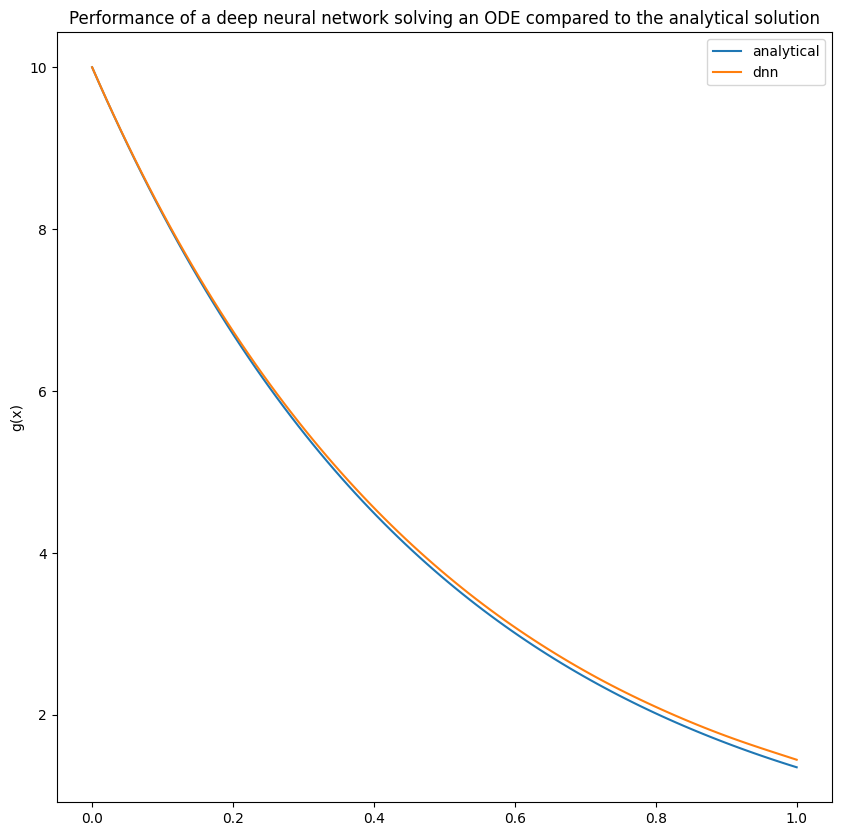

In [ ]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def deep_neural_network(deep_params, x):
    N_hidden = len(deep_params) - 1
    num_values = np.size(x)
    x = x.reshape(-1, num_values)
    x_input = x
    x_prev = x_input

    for l in range(N_hidden):
        w_hidden = deep_params[l]
        x_prev = np.concatenate((np.ones((1, num_values)), x_prev), axis=0)
        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)
        x_prev = x_hidden

    w_output = deep_params[-1]
    x_prev = np.concatenate((np.ones((1, num_values)), x_prev), axis=0)
    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output

def g_trial_deep(x, params, g0=10):
    return g0 + x * deep_neural_network(params, x)

def g(x, g_trial, gamma=2):
    return -gamma * g_trial

def cost_function_deep(P, x):
    g_t = g_trial_deep(x, P)
    d_net_out = elementwise_grad(deep_neural_network, 1)(P, x)
    d_g_t = elementwise_grad(g_trial_deep, 0)(x, P)
    func = g(x, g_t)
    err_sqr = (d_g_t - func)**2
    cost_sum = np.sum(err_sqr)
    return cost_sum / np.size(err_sqr)

def solve_ode_deep_neural_network(x, num_neurons, num_iter, lmb, beta=0.9, epsilon=1e-8):
    N_hidden = np.size(num_neurons)
    P = [None] * (N_hidden + 1)

    P[0] = np.random.randn(num_neurons[0], 2)
    for l in range(1, N_hidden):
        P[l] = np.random.randn(num_neurons[l], num_neurons[l-1] + 1)

    P[-1] = np.random.randn(1, num_neurons[-1] + 1)

    print('Initial cost: %g' % cost_function_deep(P, x))

    E_sq = [np.zeros_like(param) for param in P]

    for i in range(num_iter):
        cost_deep_grad = grad(cost_function_deep, 0)(P, x)

        for l in range(N_hidden + 1):
            E_sq[l] = beta * E_sq[l] + (1 - beta) * cost_deep_grad[l]**2
            P[l] = P[l] - lmb * cost_deep_grad[l] / (np.sqrt(E_sq[l]) + epsilon)

    print('Final cost: %g' % cost_function_deep(P, x))

    return P

def g_analytic(x, gamma=2, g0=10):
    return g0 * np.exp(-gamma * x)

if __name__ == '__main__':
    np.random.seed(15)

    N = 100
    x = np.linspace(0, 1, N, dtype=np.float64)

    num_hidden_neurons = np.array([25, 15], dtype=np.int32)
    num_iter = 10000
    lmb = np.float64(0.01)

    P = solve_ode_deep_neural_network(x, num_hidden_neurons, num_iter, lmb)

    res = g_trial_deep(x, P)
    res_analytical = g_analytic(x)

    plt.figure(figsize=(10, 10))
    plt.title('Performance of a deep neural network solving an ODE compared to the analytical solution')
    plt.plot(x, res_analytical)
    plt.plot(x, res[0, :])
    plt.legend(['analytical', 'dnn'])
    plt.ylabel('g(x)')
    plt.show()


# AdaDelta

In [ ]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def deep_neural_network(deep_params, x):
    N_hidden = len(deep_params) - 1
    num_values = np.size(x)
    x = x.reshape(-1, num_values)
    x_input = x
    x_prev = x_input

    for l in range(N_hidden):
        w_hidden = deep_params[l]
        x_prev = np.concatenate((np.ones((1, num_values)), x_prev), axis=0)
        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)
        x_prev = x_hidden

    w_output = deep_params[-1]
    x_prev = np.concatenate((np.ones((1, num_values)), x_prev), axis=0)
    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output

def g_trial_deep(x, params, g0=10):
    return g0 + x * deep_neural_network(params, x)

def g(x, g_trial, gamma=2):
    return -gamma * g_trial

def cost_function_deep(P, x):
    g_t = g_trial_deep(x, P)
    d_net_out = elementwise_grad(deep_neural_network, 1)(P, x)
    d_g_t = elementwise_grad(g_trial_deep, 0)(x, P)
    func = g(x, g_t)
    err_sqr = (d_g_t - func)**2
    cost_sum = np.sum(err_sqr)
    return cost_sum / np.size(err_sqr)

def solve_ode_deep_neural_network(x, num_neurons, num_iter, lmb, epsilon=1e-8, beta=0.95):
    N_hidden = np.size(num_neurons)
    P = [None] * (N_hidden + 1)

    P[0] = np.random.randn(num_neurons[0], 2)
    for l in range(1, N_hidden):
        P[l] = np.random.randn(num_neurons[l], num_neurons[l-1] + 1)

    P[-1] = np.random.randn(1, num_neurons[-1] + 1)

    print('Initial cost: %g' % cost_function_deep(P, x))

    S_dw = [np.zeros_like(param) for param in P]

    for i in range(num_iter):
        cost_deep_grad = grad(cost_function_deep, 0)(P, x)

        for l in range(N_hidden + 1):
            S_dw[l] = beta * S_dw[l] +  (1-beta) * cost_deep_grad[1]**2
            P[l] = P[l] - lmb * cost_deep_grad[l] / (np.sqrt(S_dw[l]) + epsilon)

    print('Final cost: %g' % cost_function_deep(P, x))

    return P

def g_analytic(x, gamma=2, g0=10):
    return g0 * np.exp(-gamma * x)

if __name__ == '__main__':
    np.random.seed(15)

    N = 100
    x = np.linspace(0, 1, N, dtype=np.float64)

    num_hidden_neurons = np.array([25, 15], dtype=np.int32)
    num_iter = 10000
    lmb = np.float64(0.01)

    P = solve_ode_deep_neural_network(x, num_hidden_neurons, num_iter, lmb)

    res = g_trial_deep(x, P)
    res_analytical = g_analytic(x)

    plt.figure(figsize=(10, 10))
    plt.title('Performance of a deep neural network solving an ODE compared to the analytical solution')
    plt.plot(x, res_analytical)
    plt.plot(x, res[0, :])
    plt.legend(['analytical', 'dnn'])
    plt.ylabel('g(x)')
    plt.show()

Initial cost: 309.98


ValueError: operands could not be broadcast together with shapes (25,2) (15,26) 

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3202: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size


Initial cost: 309.98
Final cost: 0.018657


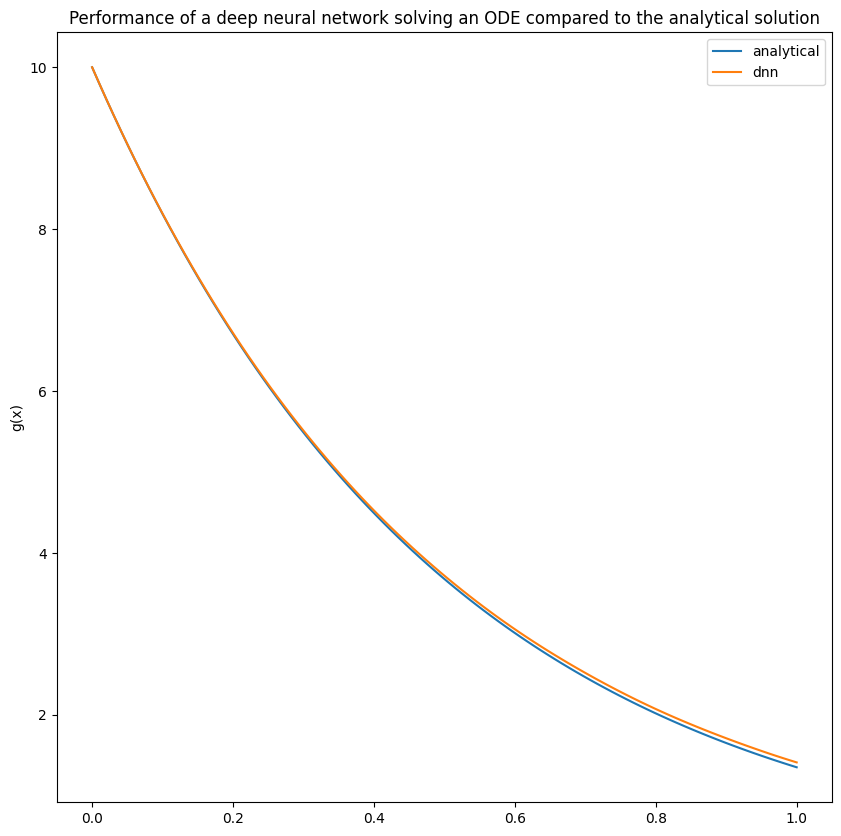

In [ ]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def deep_neural_network(deep_params, x):
    N_hidden = len(deep_params) - 1
    num_values = np.size(x)
    x = x.reshape(-1, num_values)
    x_input = x
    x_prev = x_input

    for l in range(N_hidden):
        w_hidden = deep_params[l]
        x_prev = np.concatenate((np.ones((1, num_values)), x_prev), axis=0)
        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)
        x_prev = x_hidden

    w_output = deep_params[-1]
    x_prev = np.concatenate((np.ones((1, num_values)), x_prev), axis=0)
    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output

def g_trial_deep(x, params, g0=10):
    return g0 + x * deep_neural_network(params, x)

def g(x, g_trial, gamma=2):
    return -gamma * g_trial

def cost_function_deep(P, x):
    g_t = g_trial_deep(x, P)
    d_net_out = elementwise_grad(deep_neural_network, 1)(P, x)
    d_g_t = elementwise_grad(g_trial_deep, 0)(x, P)
    func = g(x, g_t)
    err_sqr = (d_g_t - func)**2
    cost_sum = np.sum(err_sqr)
    return cost_sum / np.size(err_sqr)

def solve_ode_deep_neural_network(x, num_neurons, num_iter, beta=0.9, epsilon=1e-8):
    N_hidden = np.size(num_neurons)
    P = [None] * (N_hidden + 1)

    P[0] = np.random.randn(num_neurons[0], 2)
    for l in range(1, N_hidden):
        P[l] = np.random.randn(num_neurons[l], num_neurons[l-1] + 1)

    P[-1] = np.random.randn(1, num_neurons[-1] + 1)

    print('Initial cost: %g' % cost_function_deep(P, x))

    E_sq = [np.zeros_like(param) for param in P]
    Delta_x = [np.zeros_like(param) for param in P]

    for i in range(num_iter):
        cost_deep_grad = grad(cost_function_deep)(P, x)

        for l in range(N_hidden + 1):
            E_sq[l] = beta * E_sq[l] + (1 - beta) * cost_deep_grad[l]**2
            RMS_dx = np.sqrt(Delta_x[l] + epsilon)
            RMS_dparam = np.sqrt(E_sq[l] + epsilon)
            dparam = -RMS_dx / RMS_dparam * cost_deep_grad[l]
            Delta_x[l] = beta * Delta_x[l] + (1 - beta) * dparam**2
            P[l] = P[l] + dparam

    print('Final cost: %g' % cost_function_deep(P, x))

    return P

    ''' S_dw = [np.zeros_like(param) for param in P]

    for i in range(num_iter):
        cost_deep_grad = grad(cost_function_deep, 0)(P, x)

        for l in range(N_hidden + 1):
            S_dw[l] = beta * S_dw[l] +  (1-beta) * cost_deep_grad[1]**2
            P[l] = P[l] - lmb * cost_deep_grad[l] / (np.sqrt(S_dw[l]) + epsilon)

    print('Final cost: %g' % cost_function_deep(P, x))

    return P'''

def g_analytic(x, gamma=2, g0=10):
    return g0 * np.exp(-gamma * x)

if __name__ == '__main__':
    np.random.seed(15)

    N = 100
    x = np.linspace(0, 1, N, dtype=np.float64)

    num_hidden_neurons = np.array([25, 15], dtype=np.int32)
    num_iter = 10000

    P = solve_ode_deep_neural_network(x, num_hidden_neurons, num_iter)

    res = g_trial_deep(x, P)
    res_analytical = g_analytic(x)

    plt.figure(figsize=(10, 10))
    plt.title('Performance of a deep neural network solving an ODE compared to the analytical solution')
    plt.plot(x, res_analytical)
    plt.plot(x, res[0, :])
    plt.legend(['analytical', 'dnn'])
    plt.ylabel('g(x)')
    plt.show()

# Checking System Of ODEs

# POISSON - 2nd order

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size


Initial cost: 196.481
Final cost: 0.000204531
The max absolute difference between the solutions is: 0.000159952


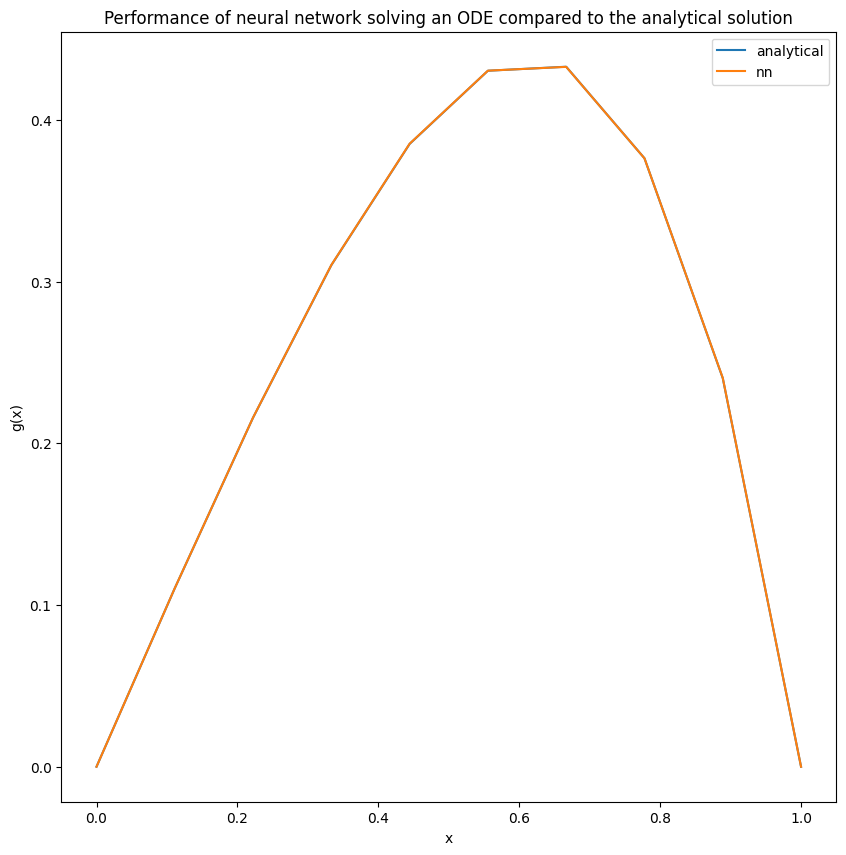

In [ ]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def deep_neural_network(deep_params, x):
    # N_hidden is the number of hidden layers
    N_hidden = len(deep_params) - 1 # -1 since params consist of parameters to all the hidden layers AND the output layer

    # Assumes input x being an one-dimensional array
    num_values = np.size(x)
    x = x.reshape(-1, num_values)

    # Assume that the input layer does nothing to the input x
    x_input = x

    # Due to multiple hidden layers, define a variable referencing to the
    # output of the previous layer:
    x_prev = x_input

    ## Hidden layers:

    for l in range(N_hidden):
        # From the list of parameters P; find the correct weigths and bias for this layer
        w_hidden = deep_params[l]

        # Add a row of ones to include bias
        x_prev = np.concatenate((np.ones((1,num_values)), x_prev ), axis = 0)

        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)

        # Update x_prev such that next layer can use the output from this layer
        x_prev = x_hidden

    ## Output layer:

    # Get the weights and bias for this layer
    w_output = deep_params[-1]

    # Include bias:
    x_prev = np.concatenate((np.ones((1,num_values)), x_prev), axis = 0)

    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output

def solve_ode_deep_neural_network(x, num_neurons, num_iter, lmb):
    # num_hidden_neurons is now a list of number of neurons within each hidden layer

    # Find the number of hidden layers:
    N_hidden = np.size(num_neurons)

    ## Set up initial weigths and biases

    # Initialize the list of parameters:
    P = [None]*(N_hidden + 1) # + 1 to include the output layer

    P[0] = npr.randn(num_neurons[0], 2 )
    for l in range(1,N_hidden):
        P[l] = npr.randn(num_neurons[l], num_neurons[l-1] + 1) # +1 to include bias

    # For the output layer
    P[-1] = npr.randn(1, num_neurons[-1] + 1 ) # +1 since bias is included

    print('Initial cost: %g'%cost_function_deep(P, x))

    ## Start finding the optimal weigths using gradient descent

    # Find the Python function that represents the gradient of the cost function
    # w.r.t the 0-th input argument -- that is the weights and biases in the hidden and output layer
    cost_function_deep_grad = grad(cost_function_deep,0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        # Evaluate the gradient at the current weights and biases in P.
        # The cost_grad consist now of N_hidden + 1 arrays; the gradient w.r.t the weights and biases
        # in the hidden layers and output layers evaluated at x.
        cost_deep_grad =  cost_function_deep_grad(P, x)

        for l in range(N_hidden+1):
            P[l] = P[l] - lmb * cost_deep_grad[l]

    print('Final cost: %g'%cost_function_deep(P, x))

    return P

## Set up the cost function specified for this Poisson equation:

# The right side of the ODE
def f(x):
    return (3*x + x**2)*np.exp(x)

def cost_function_deep(P, x):

    # Evaluate the trial function with the current parameters P
    g_t = g_trial_deep(x,P)

    # Find the derivative w.r.t x of the trial function
    # 2nd order - 2 differentiation
    d2_g_t = elementwise_grad(elementwise_grad(g_trial_deep,0))(x,P)

    right_side = f(x)

    err_sqr = (-d2_g_t - right_side)**2
    cost_sum = np.sum(err_sqr)

    return cost_sum/np.size(err_sqr)

# The trial solution:
def g_trial_deep(x,P):
    return x*(1-x)*deep_neural_network(P,x)

# The analytic solution;
def g_analytic(x):
    return x*(1-x)*np.exp(x)

if __name__ == '__main__':
    npr.seed(4155)

    ## Decide the vales of arguments to the function to solve
    Nx = 10
    x = np.linspace(0,1, Nx)

    ## Set up the initial parameters
    num_hidden_neurons = [20,10]
    num_iter = 10000
    lmb = 0.01

    P = solve_ode_deep_neural_network(x, num_hidden_neurons, num_iter, lmb)

    g_dnn_ag = g_trial_deep(x,P)
    g_analytical = g_analytic(x)

    # Find the maximum absolute difference between the solutons:
    max_diff = np.max(np.abs(g_dnn_ag - g_analytical))
    print("The max absolute difference between the solutions is: %g"%max_diff)

    plt.figure(figsize=(10,10))

    plt.title('Performance of neural network solving an ODE compared to the analytical solution')
    plt.plot(x, g_analytical)
    plt.plot(x, g_dnn_ag[0,:])
    plt.legend(['analytical','nn'])
    plt.xlabel('x')
    plt.ylabel('g(x)')
    plt.show()

# Lane-Emden (n=0,a=1)

In [ ]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def deep_neural_network(deep_params, x):
    # N_hidden is the number of hidden layers
    N_hidden = len(deep_params) - 1 # -1 since params consist of parameters to all the hidden layers AND the output layer

    # Assumes input x being an one-dimensional array
    num_values = np.size(x)
    x = x.reshape(-1, num_values)

    # Assume that the input layer does nothing to the input x
    x_input = x

    # Due to multiple hidden layers, define a variable referencing to the
    # output of the previous layer:
    x_prev = x_input

    ## Hidden layers:

    for l in range(N_hidden):
        # From the list of parameters P; find the correct weigths and bias for this layer
        w_hidden = deep_params[l]

        # Add a row of ones to include bias
        x_prev = np.concatenate((np.ones((1,num_values)), x_prev ), axis = 0)

        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)

        # Update x_prev such that next layer can use the output from this layer
        x_prev = x_hidden

    ## Output layer:

    # Get the weights and bias for this layer
    w_output = deep_params[-1]

    # Include bias:
    x_prev = np.concatenate((np.ones((1,num_values)), x_prev), axis = 0)

    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output

def solve_ode_deep_neural_network(x, num_neurons, num_iter, lmb):
    # num_hidden_neurons is now a list of number of neurons within each hidden layer

    # Find the number of hidden layers:
    N_hidden = np.size(num_neurons)

    ## Set up initial weigths and biases

    # Initialize the list of parameters:
    P = [None]*(N_hidden + 1) # + 1 to include the output layer

    P[0] = npr.randn(num_neurons[0], 2 )
    for l in range(1,N_hidden):
        P[l] = npr.randn(num_neurons[l], num_neurons[l-1] + 1) # +1 to include bias

    # For the output layer
    P[-1] = npr.randn(1, num_neurons[-1] + 1 ) # +1 since bias is included

    print('Initial cost: %g'%cost_function_deep(P, x))

    cost_function_deep_grad = grad(cost_function_deep,0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        cost_deep_grad =  cost_function_deep_grad(P, x)

        for l in range(N_hidden+1):
            P[l] = P[l] - lmb * cost_deep_grad[l]

    print('Final cost: %g'%cost_function_deep(P, x))

    return P

# The right side of the ODE
def f(x):
      return -((2/x)*elementwise_grad(g_analytic,0)(x)+1)

def cost_function_deep(P, x):

    # Evaluate the trial function with the current parameters P
    g_t = g_trial_deep(x,P)

    # Find the derivative w.r.t x of the trial function
    d2_g_t = elementwise_grad(elementwise_grad(g_trial_deep,0))(x,P)

    right_side = f(x)

    err_sqr = (d2_g_t - right_side)**2
    cost_sum = np.sum(err_sqr)

    return cost_sum/np.size(err_sqr)

# The trial solution:
def g_trial_deep(x,P):
    return 1 - (x**2)*deep_neural_network(P,x)

# The analytic solution;
def g_analytic(x):
    return 1 - (x**2)/6

if __name__ == '__main__':
    npr.seed(4155)

    ## Decide the vales of arguments to the function to solve
    Nx = 10
    x = np.linspace(0.001,1, Nx)

    ## Set up the initial parameters
    num_hidden_neurons = [50,50,50]
    num_iter = 10000
    lmb = 0.01

    P = solve_ode_deep_neural_network(x, num_hidden_neurons, num_iter, lmb)

    g_dnn_ag = g_trial_deep(x,P)
    g_analytical = g_analytic(x)

    # Find the maximum absolute difference between the solutons:
    max_diff = np.max(np.abs(g_dnn_ag - g_analytical))
    print("The max absolute difference between the solutions is: %g"%max_diff)

    plt.figure(figsize=(10,10))

    plt.title('Performance of neural network solving an ODE compared to the analytical solution')
    plt.plot(x, g_analytical)
    plt.plot(x, g_dnn_ag[0,:])
    plt.legend(['analytical','dnn'])
    plt.xlabel('x')
    plt.ylabel('g(x)')
    plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

Initial cost: 10.0909
Final cost: 9.00231e-09
The max absolute difference between the solutions is: 2.6657e-06


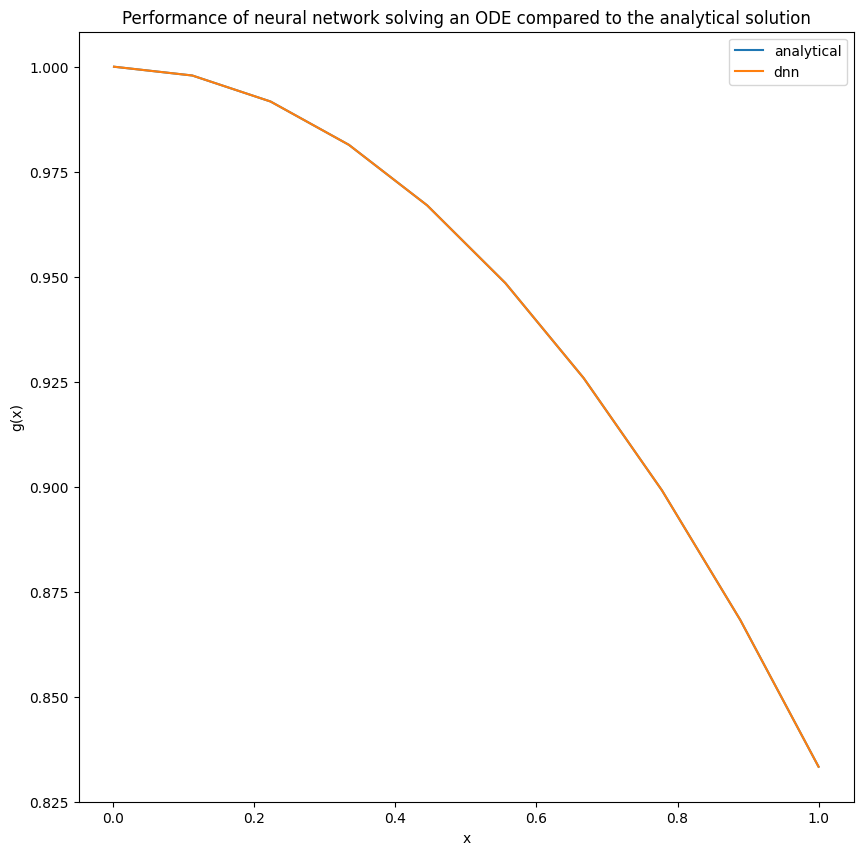

In [ ]:
# ADAM
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def deep_neural_network(deep_params, x):
    # N_hidden is the number of hidden layers
    N_hidden = len(deep_params) - 1  # -1 since params consist of parameters to all the hidden layers AND the output layer

    # Assumes input x being a one-dimensional array
    num_values = np.size(x)
    x = x.reshape(-1, num_values)

    # Assume that the input layer does nothing to the input x
    x_input = x

    # Due to multiple hidden layers, define a variable referencing to the
    # output of the previous layer:
    x_prev = x_input

    ## Hidden layers:
    for l in range(N_hidden):
        # From the list of parameters P; find the correct weights and bias for this layer
        w_hidden = deep_params[l]

        # Add a row of ones to include bias
        x_prev = np.concatenate((np.ones((1, num_values)), x_prev), axis=0)

        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)

        # Update x_prev such that next layer can use the output from this layer
        x_prev = x_hidden

    ## Output layer:
    # Get the weights and bias for this layer
    w_output = deep_params[-1]

    # Include bias:
    x_prev = np.concatenate((np.ones((1, num_values)), x_prev), axis=0)

    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output

def solve_ode_deep_neural_network(x, num_neurons, num_iter, lmb, beta1=0.9, beta2=0.999, epsilon=1e-8):
    # num_hidden_neurons is now a list of number of neurons within each hidden layer

    # Find the number of hidden layers:
    N_hidden = len(num_neurons)

    ## Set up initial weights and biases

    # Initialize the list of parameters:
    P = [None] * (N_hidden + 1)  # + 1 to include the output layer

    P[0] = npr.randn(num_neurons[0], 2)
    for l in range(1, N_hidden):
        P[l] = npr.randn(num_neurons[l], num_neurons[l - 1] + 1)  # +1 to include bias

    # For the output layer
    P[-1] = npr.randn(1, num_neurons[-1] + 1)  # +1 since bias is included

    print('Initial cost: %g' % cost_function_deep(P, x))

    # Initialize first and second moment variables
    m = [np.zeros_like(param) for param in P]
    v = [np.zeros_like(param) for param in P]
    t = 0

    cost_function_deep_grad = grad(cost_function_deep, 0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        t += 1
        cost_deep_grad = cost_function_deep_grad(P, x)

        for l in range(N_hidden + 1):
            m[l] = beta1 * m[l] + (1 - beta1) * cost_deep_grad[l]
            v[l] = beta2 * v[l] + (1 - beta2) * (cost_deep_grad[l] ** 2)
            m_hat = m[l] / (1 - beta1 ** t)
            v_hat = v[l] / (1 - beta2 ** t)
            P[l] -= lmb * m_hat / (np.sqrt(v_hat) + epsilon)

    print('Final cost: %g' % cost_function_deep(P, x))

    return P

# The right side of the ODE
def f(x):
    return -((2 / x) * elementwise_grad(g_analytic, 0)(x) + 1)

def cost_function_deep(P, x):
    # Evaluate the trial function with the current parameters P
    g_t = g_trial_deep(x, P)

    # Find the derivative w.r.t x of the trial function
    d2_g_t = elementwise_grad(elementwise_grad(g_trial_deep, 0))(x, P)

    right_side = f(x)

    err_sqr = (d2_g_t - right_side) ** 2
    cost_sum = np.sum(err_sqr)

    return cost_sum / np.size(err_sqr)

# The trial solution:
def g_trial_deep(x, P):
    return 1 - (x ** 2) * deep_neural_network(P, x)

# The analytic solution;
def g_analytic(x):
    return 1 - (x ** 2) / 6

if __name__ == '__main__':
    npr.seed(4155)

    ## Decide the vales of arguments to the function to solve
    Nx = 10
    x = np.linspace(0.001, 1, Nx)

    ## Set up the initial parameters
    num_hidden_neurons = [50, 50, 50]
    num_iter = 10000
    lmb = 0.01

    P = solve_ode_deep_neural_network(x, num_hidden_neurons, num_iter, lmb)

    g_dnn_ag = g_trial_deep(x, P)
    g_analytical = g_analytic(x)

    # Find the maximum absolute difference between the solutons:
    max_diff = np.max(np.abs(g_dnn_ag - g_analytical))
    print("The max absolute difference between the solutions is: %g" % max_diff)

    plt.figure(figsize=(10, 10))

    plt.title('Performance of neural network solving an ODE compared to the analytical solution')
    plt.plot(x, g_analytical)
    plt.plot(x, g_dnn_ag[0, :])
    plt.legend(['analytical', 'dnn'])
    plt.xlabel('x')
    plt.ylabel('g(x)')
    plt.show()

Initial cost: 10.0909
Final cost: 4.58263e-07
The max absolute difference between the solutions is: 0.000116098


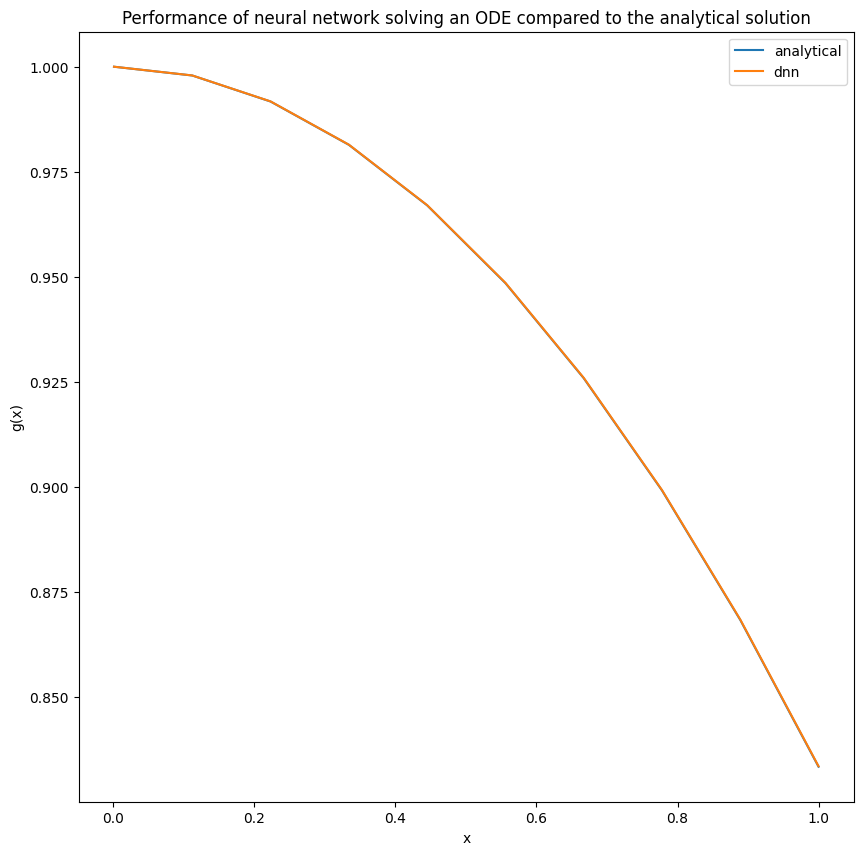

In [ ]:
# Ada Grad
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def deep_neural_network(deep_params, x):
    # N_hidden is the number of hidden layers
    N_hidden = len(deep_params) - 1  # -1 since params consist of parameters to all the hidden layers AND the output layer

    # Assumes input x being a one-dimensional array
    num_values = np.size(x)
    x = x.reshape(-1, num_values)

    # Assume that the input layer does nothing to the input x
    x_input = x

    # Due to multiple hidden layers, define a variable referencing to the
    # output of the previous layer:
    x_prev = x_input

    ## Hidden layers:
    for l in range(N_hidden):
        # From the list of parameters P; find the correct weights and bias for this layer
        w_hidden = deep_params[l]

        # Add a row of ones to include bias
        x_prev = np.concatenate((np.ones((1, num_values)), x_prev), axis=0)

        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)

        # Update x_prev such that next layer can use the output from this layer
        x_prev = x_hidden

    ## Output layer:
    # Get the weights and bias for this layer
    w_output = deep_params[-1]

    # Include bias:
    x_prev = np.concatenate((np.ones((1, num_values)), x_prev), axis=0)

    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output

def solve_ode_deep_neural_network(x, num_neurons, num_iter, lmb, epsilon=1e-8):
    # num_hidden_neurons is now a list of number of neurons within each hidden layer

    # Find the number of hidden layers:
    N_hidden = len(num_neurons)

    ## Set up initial weights and biases

    # Initialize the list of parameters:
    P = [None] * (N_hidden + 1)  # + 1 to include the output layer

    P[0] = npr.randn(num_neurons[0], 2)
    for l in range(1, N_hidden):
        P[l] = npr.randn(num_neurons[l], num_neurons[l - 1] + 1)  # +1 to include bias

    # For the output layer
    P[-1] = npr.randn(1, num_neurons[-1] + 1)  # +1 since bias is included

    print('Initial cost: %g' % cost_function_deep(P, x))

    # Initialize sum of squared gradients
    G = [np.zeros_like(param) for param in P]

    cost_function_deep_grad = grad(cost_function_deep, 0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        cost_deep_grad = cost_function_deep_grad(P, x)

        for l in range(N_hidden + 1):
            G[l] += cost_deep_grad[l] ** 2
            scaling_factor = np.sqrt(G[l] + epsilon)
            P[l] -= lmb * cost_deep_grad[l] / scaling_factor

    print('Final cost: %g' % cost_function_deep(P, x))

    return P

# The right side of the ODE
def f(x):
    return -((2 / x) * elementwise_grad(g_analytic, 0)(x) + 1)

def cost_function_deep(P, x):
    # Evaluate the trial function with the current parameters P
    g_t = g_trial_deep(x, P)

    # Find the derivative w.r.t x of the trial function
    d2_g_t = elementwise_grad(elementwise_grad(g_trial_deep, 0))(x, P)

    right_side = f(x)

    err_sqr = (d2_g_t - right_side) ** 2
    cost_sum = np.sum(err_sqr)

    return cost_sum / np.size(err_sqr)

# The trial solution:
def g_trial_deep(x, P):
    return 1 - (x ** 2) * deep_neural_network(P, x)

# The analytic solution;
def g_analytic(x):
    return 1 - (x ** 2) / 6

if __name__ == '__main__':
    npr.seed(4155)

    ## Decide the vales of arguments to the function to solve
    Nx = 10
    x = np.linspace(0.001, 1, Nx)

    ## Set up the initial parameters
    num_hidden_neurons = [50, 50, 50]
    num_iter = 10000
    lmb = 0.01

    P = solve_ode_deep_neural_network(x, num_hidden_neurons, num_iter, lmb)

    g_dnn_ag = g_trial_deep(x, P)
    g_analytical = g_analytic(x)

    # Find the maximum absolute difference between the solutions:
    max_diff = np.max(np.abs(g_dnn_ag - g_analytical))
    print("The max absolute difference between the solutions is: %g" % max_diff)

    plt.figure(figsize=(10, 10))

    plt.title('Performance of neural network solving an ODE compared to the analytical solution')
    plt.plot(x, g_analytical)
    plt.plot(x, g_dnn_ag[0, :])
    plt.legend(['analytical', 'dnn'])
    plt.xlabel('x')
    plt.ylabel('g(x)')
    plt.show()

Initial cost: 10.0909
Final cost: 0.0676005
The max absolute difference between the solutions is: 0.130005


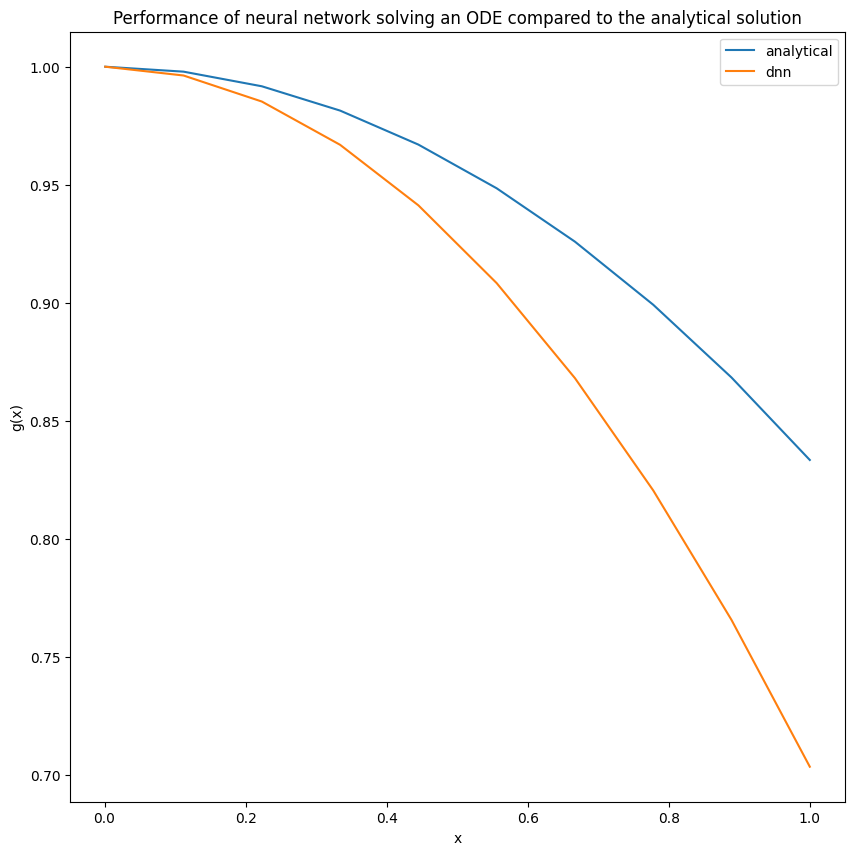

In [ ]:
# RMS PROP
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def deep_neural_network(deep_params, x):
    # N_hidden is the number of hidden layers
    N_hidden = len(deep_params) - 1  # -1 since params consist of parameters to all the hidden layers AND the output layer

    # Assumes input x being a one-dimensional array
    num_values = np.size(x)
    x = x.reshape(-1, num_values)

    # Assume that the input layer does nothing to the input x
    x_input = x

    # Due to multiple hidden layers, define a variable referencing to the
    # output of the previous layer:
    x_prev = x_input

    ## Hidden layers:
    for l in range(N_hidden):
        # From the list of parameters P; find the correct weights and bias for this layer
        w_hidden = deep_params[l]

        # Add a row of ones to include bias
        x_prev = np.concatenate((np.ones((1, num_values)), x_prev), axis=0)

        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)

        # Update x_prev such that next layer can use the output from this layer
        x_prev = x_hidden

    ## Output layer:
    # Get the weights and bias for this layer
    w_output = deep_params[-1]

    # Include bias:
    x_prev = np.concatenate((np.ones((1, num_values)), x_prev), axis=0)

    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output

def solve_ode_deep_neural_network(x, num_neurons, num_iter, lmb, beta=0.9, epsilon=1e-8):
    # num_hidden_neurons is now a list of number of neurons within each hidden layer

    # Find the number of hidden layers:
    N_hidden = len(num_neurons)

    ## Set up initial weights and biases

    # Initialize the list of parameters:
    P = [None] * (N_hidden + 1)  # + 1 to include the output layer

    P[0] = npr.randn(num_neurons[0], 2)
    for l in range(1, N_hidden):
        P[l] = npr.randn(num_neurons[l], num_neurons[l - 1] + 1)  # +1 to include bias

    # For the output layer
    P[-1] = npr.randn(1, num_neurons[-1] + 1)  # +1 since bias is included

    print('Initial cost: %g' % cost_function_deep(P, x))

    # Initialize exponentially weighted moving average of squared gradients
    E_sq = [np.zeros_like(param) for param in P]

    cost_function_deep_grad = grad(cost_function_deep, 0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        cost_deep_grad = cost_function_deep_grad(P, x)

        for l in range(N_hidden + 1):
            E_sq[l] = beta * E_sq[l] + (1 - beta) * cost_deep_grad[l] ** 2
            scaling_factor = np.sqrt(E_sq[l] + epsilon)
            P[l] -= lmb * cost_deep_grad[l] / scaling_factor

    print('Final cost: %g' % cost_function_deep(P, x))

    return P

# The right side of the ODE
def f(x):
    return -((2 / x) * elementwise_grad(g_analytic, 0)(x) + 1)

def cost_function_deep(P, x):
    # Evaluate the trial function with the current parameters P
    g_t = g_trial_deep(x, P)

    # Find the derivative w.r.t x of the trial function
    d2_g_t = elementwise_grad(elementwise_grad(g_trial_deep, 0))(x, P)

    right_side = f(x)

    err_sqr = (d2_g_t - right_side) ** 2
    cost_sum = np.sum(err_sqr)

    return cost_sum / np.size(err_sqr)

# The trial solution:
def g_trial_deep(x, P):
    return 1 - (x ** 2) * deep_neural_network(P, x)

# The analytic solution;
def g_analytic(x):
    return 1 - (x ** 2) / 6

if __name__ == '__main__':
    npr.seed(4155)

    ## Decide the values of arguments to the function to solve
    Nx = 10
    x = np.linspace(0.001, 1, Nx)

    ## Set up the initial parameters
    num_hidden_neurons = [50, 50, 50]
    num_iter = 10000
    lmb = 0.01

    P = solve_ode_deep_neural_network(x, num_hidden_neurons, num_iter, lmb)

    g_dnn_ag = g_trial_deep(x, P)
    g_analytical = g_analytic(x)

    # Find the maximum absolute difference between the solutions:
    max_diff = np.max(np.abs(g_dnn_ag - g_analytical))
    print("The max absolute difference between the solutions is: %g" % max_diff)

    plt.figure(figsize=(10, 10))

    plt.title('Performance of neural network solving an ODE compared to the analytical solution')
    plt.plot(x, g_analytical)
    plt.plot(x, g_dnn_ag[0, :])
    plt.legend(['analytical', 'dnn'])
    plt.xlabel('x')
    plt.ylabel('g(x)')
    plt.show()

Initial cost: 10.0909
Final cost: 0.00755815
The max absolute difference between the solutions is: 0.0435427


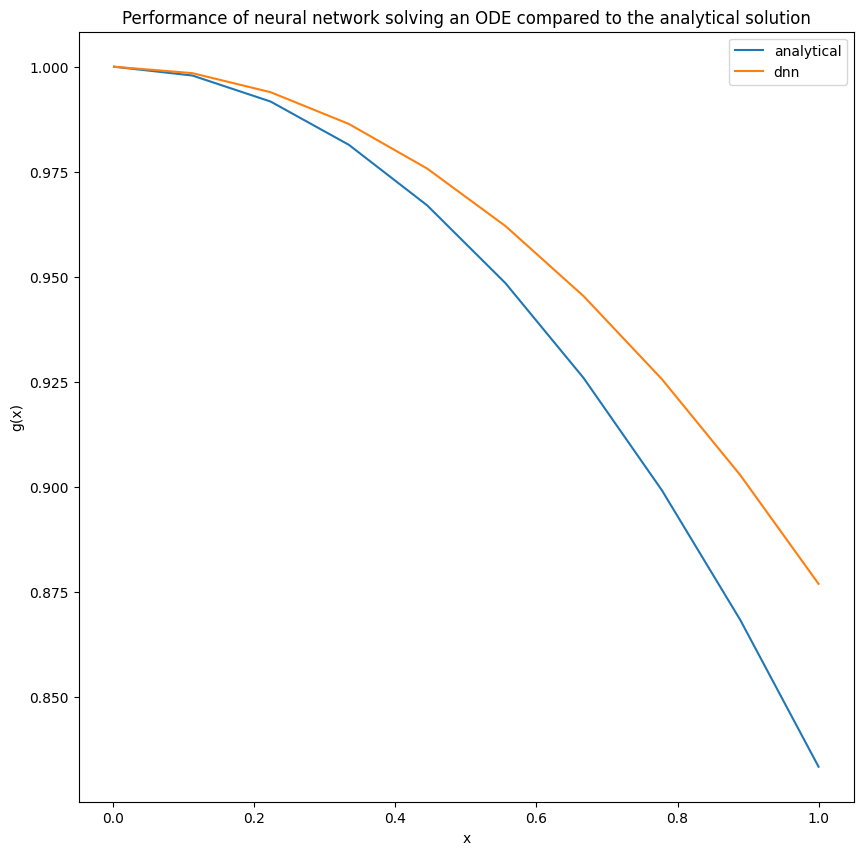

In [ ]:
# ADA DELTA
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def deep_neural_network(deep_params, x):
    N_hidden = len(deep_params) - 1
    num_values = np.size(x)
    x = x.reshape(-1, num_values)
    x_input = x
    x_prev = x_input

    for l in range(N_hidden):
        w_hidden = deep_params[l]
        x_prev = np.concatenate((np.ones((1, num_values)), x_prev), axis=0)
        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)
        x_prev = x_hidden

    w_output = deep_params[-1]
    x_prev = np.concatenate((np.ones((1, num_values)), x_prev), axis=0)
    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output

def solve_ode_deep_neural_network(x, num_neurons, num_iter, epsilon=1e-8, rho=0.95):
    N_hidden = np.size(num_neurons)
    P = [None] * (N_hidden + 1)

    P[0] = npr.randn(num_neurons[0], 2)
    for l in range(1, N_hidden):
        P[l] = npr.randn(num_neurons[l], num_neurons[l - 1] + 1)

    P[-1] = npr.randn(1, num_neurons[-1] + 1)

    print('Initial cost: %g' % cost_function_deep(P, x))

    E_sq = [np.zeros_like(param) for param in P]
    Delta_x = [np.zeros_like(param) for param in P]

    cost_deep_grad = grad(cost_function_deep)

    for i in range(num_iter):
        cost_grad = cost_deep_grad(P, x)

        for l in range(N_hidden + 1):
            E_sq[l] = rho * E_sq[l] + (1 - rho) * cost_grad[l] ** 2
            RMS_dx = np.sqrt(Delta_x[l] + epsilon)
            RMS_dparam = np.sqrt(E_sq[l] + epsilon)
            dparam = -RMS_dx / RMS_dparam * cost_grad[l]
            Delta_x[l] = rho * Delta_x[l] + (1 - rho) * dparam ** 2
            P[l] += dparam

    print('Final cost: %g' % cost_function_deep(P, x))

    return P

def f(x):
    return -((2 / x) * elementwise_grad(g_analytic, 0)(x) + 1)

def cost_function_deep(P, x):
    g_t = g_trial_deep(x, P)
    d2_g_t = elementwise_grad(elementwise_grad(g_trial_deep, 0))(x, P)
    right_side = f(x)
    err_sqr = (d2_g_t - right_side) ** 2
    cost_sum = np.sum(err_sqr)
    return cost_sum / np.size(err_sqr)

def g_trial_deep(x, P):
    return 1 - (x ** 2) * deep_neural_network(P, x)

def g_analytic(x):
    return 1 - (x ** 2) / 6

if __name__ == '__main__':
    npr.seed(4155)
    Nx = 10
    x = np.linspace(0.001, 1, Nx)
    num_hidden_neurons = [50, 50, 50]
    num_iter = 10000
    epsilon = 1e-8
    rho = 0.95
    P = solve_ode_deep_neural_network(x, num_hidden_neurons, num_iter, epsilon, rho)
    g_dnn_ag = g_trial_deep(x, P)
    g_analytical = g_analytic(x)
    max_diff = np.max(np.abs(g_dnn_ag - g_analytical))
    print("The max absolute difference between the solutions is: %g" % max_diff)

    plt.figure(figsize=(10, 10))
    plt.title('Performance of neural network solving an ODE compared to the analytical solution')
    plt.plot(x, g_analytical)
    plt.plot(x, g_dnn_ag[0, :])
    plt.legend(['analytical', 'dnn'])
    plt.xlabel('x')
    plt.ylabel('g(x)')
    plt.show()

# Lane-Emden (n=1,a=1)

Initial cost: 86.9107
Final cost: 0.000177091
The max absolute difference between the solutions is: 0.000305726


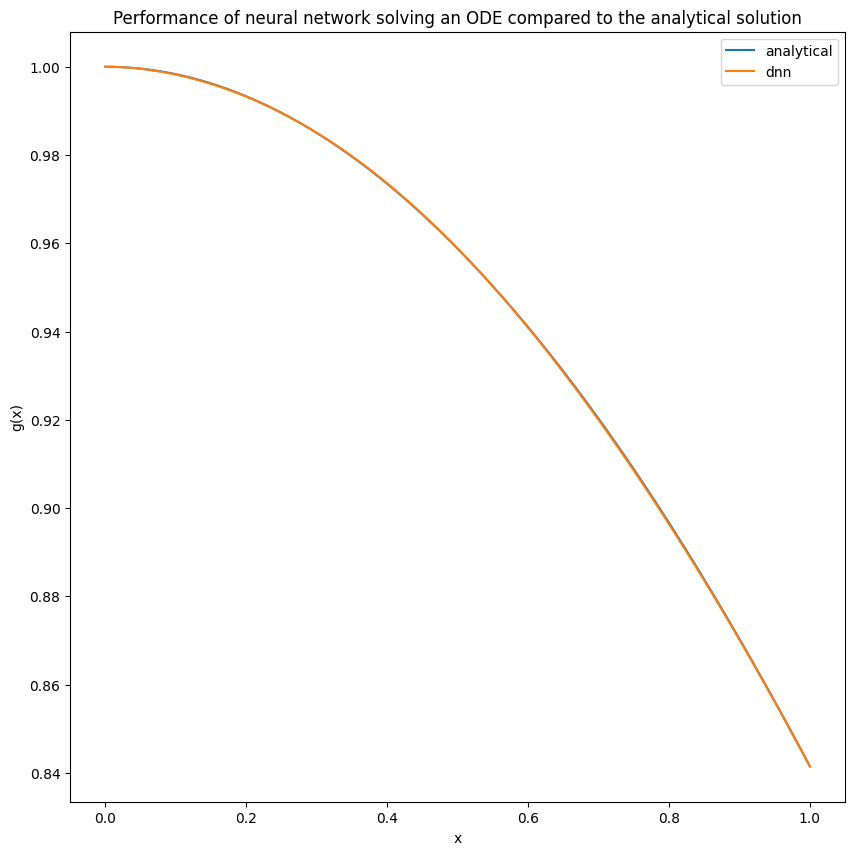

In [ ]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def deep_neural_network(deep_params, x):
    # N_hidden is the number of hidden layers
    N_hidden = len(deep_params) - 1 # -1 since params consist of parameters to all the hidden layers AND the output layer

    # Assumes input x being an one-dimensional array
    num_values = np.size(x)
    x = x.reshape(-1, num_values)

    # Assume that the input layer does nothing to the input x
    x_input = x

    # Due to multiple hidden layers, define a variable referencing to the
    # output of the previous layer:
    x_prev = x_input

    ## Hidden layers:

    for l in range(N_hidden):
        # From the list of parameters P; find the correct weigths and bias for this layer
        w_hidden = deep_params[l]

        # Add a row of ones to include bias
        x_prev = np.concatenate((np.ones((1,num_values)), x_prev ), axis = 0)

        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)

        # Update x_prev such that next layer can use the output from this layer
        x_prev = x_hidden

    ## Output layer:

    # Get the weights and bias for this layer
    w_output = deep_params[-1]

    # Include bias:
    x_prev = np.concatenate((np.ones((1,num_values)), x_prev), axis = 0)

    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output

def solve_ode_deep_neural_network(x, num_neurons, num_iter, lmb):
    # num_hidden_neurons is now a list of number of neurons within each hidden layer

    # Find the number of hidden layers:
    N_hidden = np.size(num_neurons)

    ## Set up initial weigths and biases

    # Initialize the list of parameters:
    P = [None]*(N_hidden + 1) # + 1 to include the output layer

    P[0] = npr.randn(num_neurons[0], 2 )
    for l in range(1,N_hidden):
        P[l] = npr.randn(num_neurons[l], num_neurons[l-1] + 1) # +1 to include bias

    # For the output layer
    P[-1] = npr.randn(1, num_neurons[-1] + 1 ) # +1 since bias is included

    print('Initial cost: %g'%cost_function_deep(P, x))

    ## Start finding the optimal weigths using gradient descent

    # Find the Python function that represents the gradient of the cost function
    # w.r.t the 0-th input argument -- that is the weights and biases in the hidden and output layer
    cost_function_deep_grad = grad(cost_function_deep,0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        # Evaluate the gradient at the current weights and biases in P.
        # The cost_grad consist now of N_hidden + 1 arrays; the gradient w.r.t the weights and biases
        # in the hidden layers and output layers evaluated at x.
        cost_deep_grad =  cost_function_deep_grad(P, x)

        for l in range(N_hidden+1):
            P[l] = P[l] - lmb * cost_deep_grad[l]

    print('Final cost: %g'%cost_function_deep(P, x))

    return P

## Set up the cost function specified for this Poisson equation:

# The right side of the ODE
def f(x):
      return -((2/x)*elementwise_grad(g_analytic,0)(x)+g_analytic(x))

def cost_function_deep(P, x):

    # Evaluate the trial function with the current parameters P
    g_t = g_trial_deep(x,P)

    # Find the derivative w.r.t x of the trial function
    d2_g_t = elementwise_grad(elementwise_grad(g_trial_deep,0))(x,P)

    right_side = f(x)

    err_sqr = (d2_g_t - right_side)**2
    cost_sum = np.sum(err_sqr)

    return cost_sum/np.size(err_sqr)

# The trial solution:
def g_trial_deep(x,P):
    return 1 + (x**2)*deep_neural_network(P,x)

# The analytic solution;
def g_analytic(x):
    return np.sin(x)/x

if __name__ == '__main__':
    npr.seed(4155)

    ## Decide the vales of arguments to the function to solve
    Nx = 1000
    x = np.linspace(0.001,1, Nx)

    ## Set up the initial parameters
    num_hidden_neurons = [20,10]
    num_iter = 10000
    lmb = 0.01

    P = solve_ode_deep_neural_network(x, num_hidden_neurons, num_iter, lmb)

    g_dnn_ag = g_trial_deep(x,P)
    g_analytical = g_analytic(x)

    # Find the maximum absolute difference between the solutons:
    max_diff = np.max(np.abs(g_dnn_ag - g_analytical))
    print("The max absolute difference between the solutions is: %g"%max_diff)

    plt.figure(figsize=(10,10))

    plt.title('Performance of neural network solving an ODE compared to the analytical solution')
    plt.plot(x, g_analytical)
    plt.plot(x, g_dnn_ag[0,:])
    plt.legend(['analytical','dnn'])
    plt.xlabel('x')
    plt.ylabel('g(x)')
    plt.show()

# Simple First order

change optimzation methods and check for first order

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size


Initial cost: 4.58521
Final cost: 0.000262311


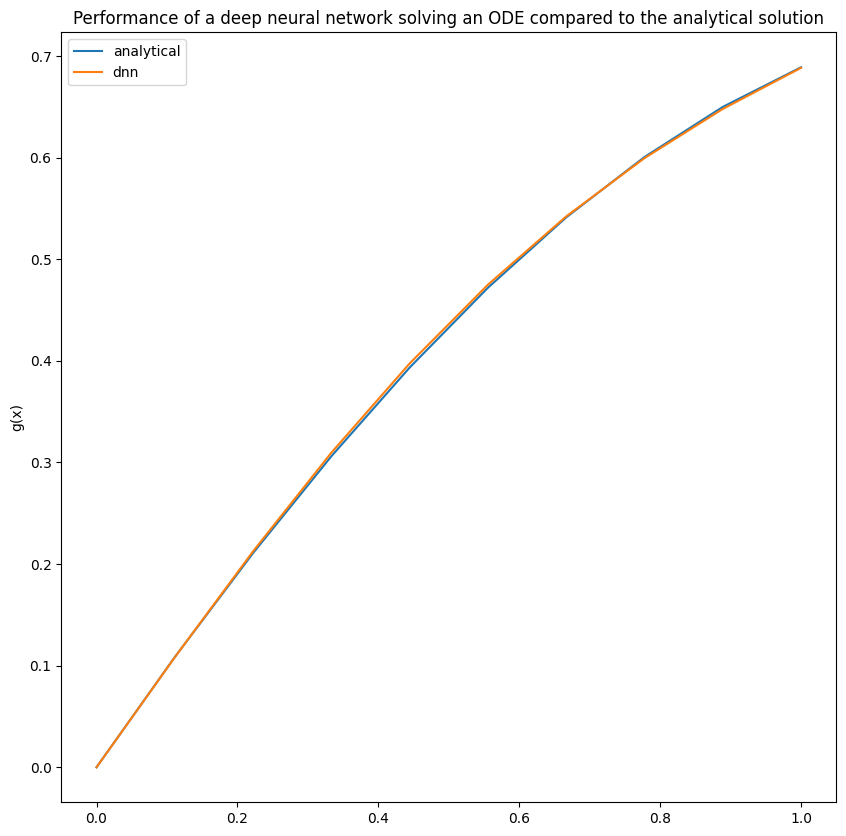

In [ ]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1/(1 + np.exp(-z))

# The neural network with one input layer and one output layer,
# but with number of hidden layers specified by the user.
def deep_neural_network(deep_params, x):
    # N_hidden is the number of hidden layers

    N_hidden = len(deep_params) - 1 # -1 since params consists of
                                        # parameters to all the hidden
                                        # layers AND the output layer.

    # Assumes input x being an one-dimensional array
    num_values = np.size(x)
    x = x.reshape(-1, num_values)

    # Assume that the input layer does nothing to the input x
    x_input = x

    # Due to multiple hidden layers, define a variable referencing to the
    # output of the previous layer:
    x_prev = x_input

    ## Hidden layers:

    for l in range(N_hidden):
        # From the list of parameters P; find the correct weigths and bias for this layer
        w_hidden = deep_params[l]

        # Add a row of ones to include bias
        x_prev = np.concatenate((np.ones((1,num_values)), x_prev ), axis = 0)

        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)

        # Update x_prev such that next layer can use the output from this layer
        x_prev = x_hidden

    ## Output layer:

    # Get the weights and bias for this layer
    w_output = deep_params[-1]

    # Include bias:
    x_prev = np.concatenate((np.ones((1,num_values)), x_prev), axis = 0)

    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output

# The trial solution using the deep neural network:
def g_trial_deep(x,params, g0 = 10):
    return  x*deep_neural_network(params, x)

# The right side of the ODE:
def g(x, g_trial, gamma = 0.2):
    return -gamma*g_trial + np.exp(-gamma*x)*np.cos(x)

# The same cost function as before, but calls deep_neural_network instead.
def cost_function_deep(P, x):

    # Evaluate the trial function with the current parameters P
    g_t = g_trial_deep(x,P)

    # Find the derivative w.r.t x of the neural network
    d_net_out = elementwise_grad(deep_neural_network,1)(P,x)

    # Find the derivative w.r.t x of the trial function
    d_g_t = elementwise_grad(g_trial_deep,0)(x,P)

    # The right side of the ODE
    func = g(x, g_t)

    err_sqr = (d_g_t - func)**2
    cost_sum = np.sum(err_sqr)

    return cost_sum / np.size(err_sqr)

# Solve the exponential decay ODE using neural network with one input and one output layer,
# but with specified number of hidden layers from the user.
def solve_ode_deep_neural_network(x, num_neurons, num_iter, lmb):
    # num_hidden_neurons is now a list of number of neurons within each hidden layer

    # The number of elements in the list num_hidden_neurons thus represents
    # the number of hidden layers.

    # Find the number of hidden layers:
    N_hidden = np.size(num_neurons)

    ## Set up initial weights and biases

    # Initialize the list of parameters:
    P = [None]*(N_hidden + 1) # + 1 to include the output layer

    P[0] = npr.randn(num_neurons[0], 2 )
    for l in range(1,N_hidden):
        P[l] = npr.randn(num_neurons[l], num_neurons[l-1] + 1) # +1 to include bias

    # For the output layer
    P[-1] = npr.randn(1, num_neurons[-1] + 1 ) # +1 since bias is included

    print('Initial cost: %g'%cost_function_deep(P, x))

    ## Start finding the optimal weights using gradient descent

    # Find the Python function that represents the gradient of the cost function
    # w.r.t the 0-th input argument -- that is the weights and biases in the hidden and output layer
    cost_function_deep_grad = grad(cost_function_deep,0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        # Evaluate the gradient at the current weights and biases in P.
        # The cost_grad consist now of N_hidden + 1 arrays; the gradient w.r.t the weights and biases
        # in the hidden layers and output layers evaluated at x.
        cost_deep_grad =  cost_function_deep_grad(P, x)

        for l in range(N_hidden+1):
            P[l] = P[l] - lmb * cost_deep_grad[l]

    print('Final cost: %g'%cost_function_deep(P, x))

    return P

def g_analytic(x, gamma = 0.2, g0 = 10):
    return np.sin(x)/(np.exp(gamma*x))

# Solve the given problem
if __name__ == '__main__':
    npr.seed(15)

    ## Decide the vales of arguments to the function to solve
    N = 10
    x = np.linspace(0, 1, N)

    ## Set up the initial parameters
    num_hidden_neurons = np.array([25,15])
    num_iter = 10000
    lmb = 0.01

    P = solve_ode_deep_neural_network(x, num_hidden_neurons, num_iter, lmb)

    res = g_trial_deep(x,P)
    res_analytical = g_analytic(x)

    plt.figure(figsize=(10,10))

    plt.title('Performance of a deep neural network solving an ODE compared to the analytical solution')
    plt.plot(x, res_analytical)
    plt.plot(x, res[0,:])
    plt.legend(['analytical','dnn'])
    plt.ylabel('g(x)')
    plt.show()

#Newton's law of cooling

# Testing

Initial cost:  3.2711628533238466
Completed 0 iterations.
Loss: 3.1912378339001157
Completed 50 iterations.
Loss: 2.4757977503241326
Final cost:  2.4323231395236538
Max absolute difference between the analytical solution and the network: 1.47152


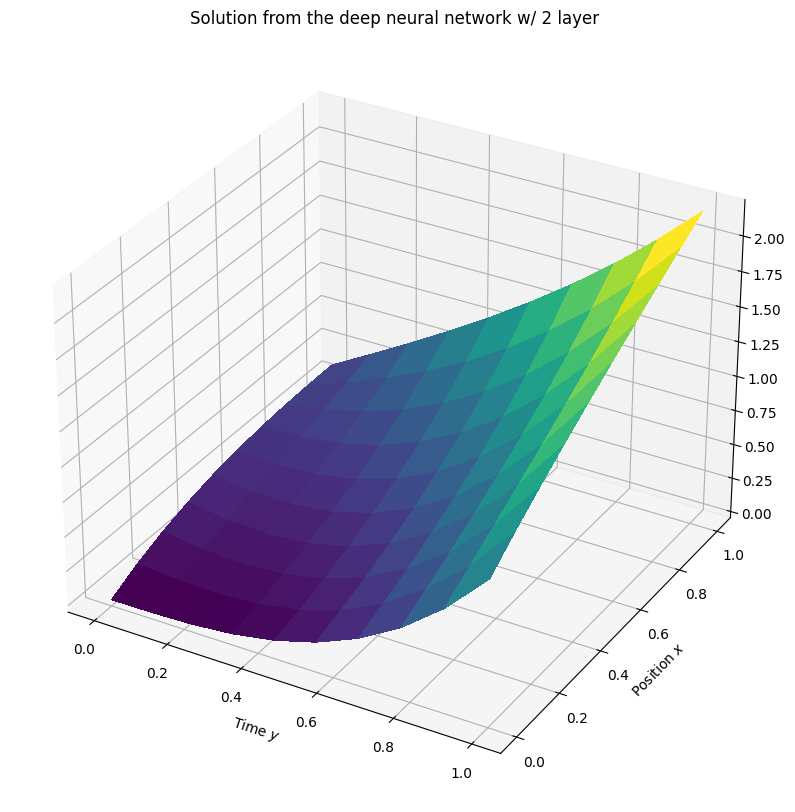

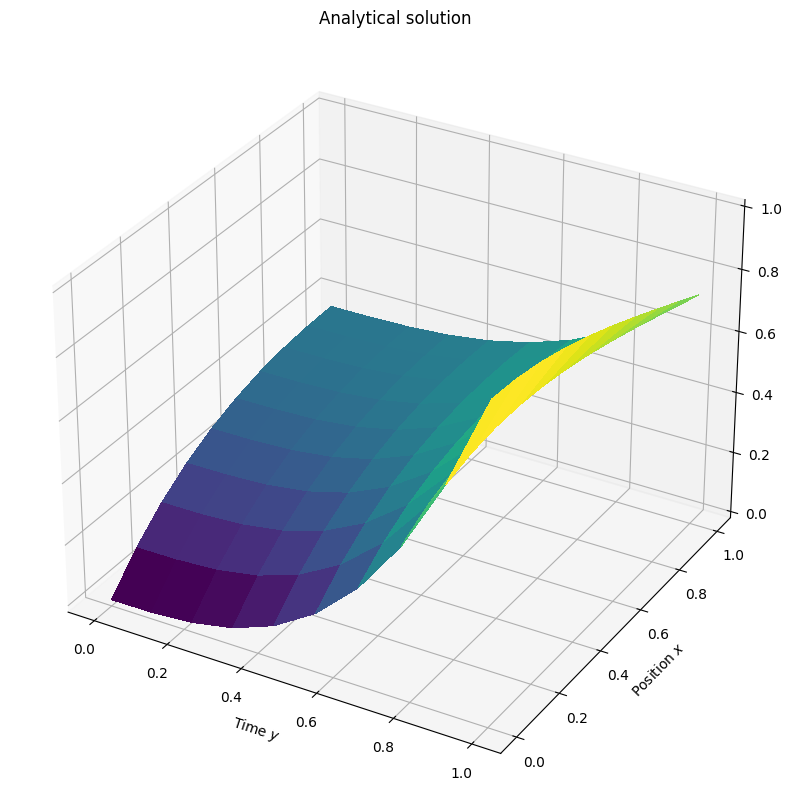

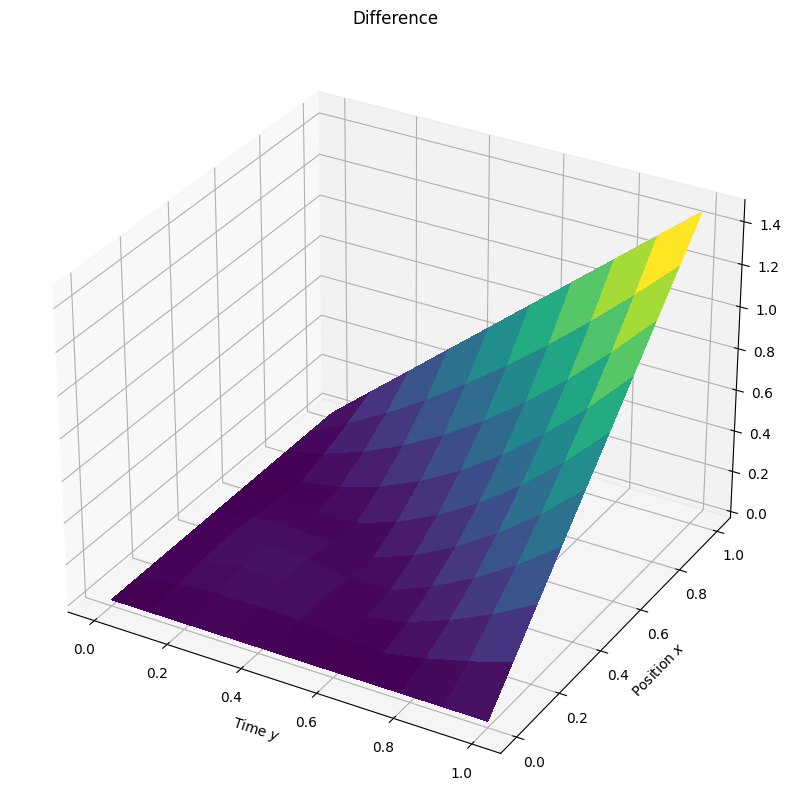

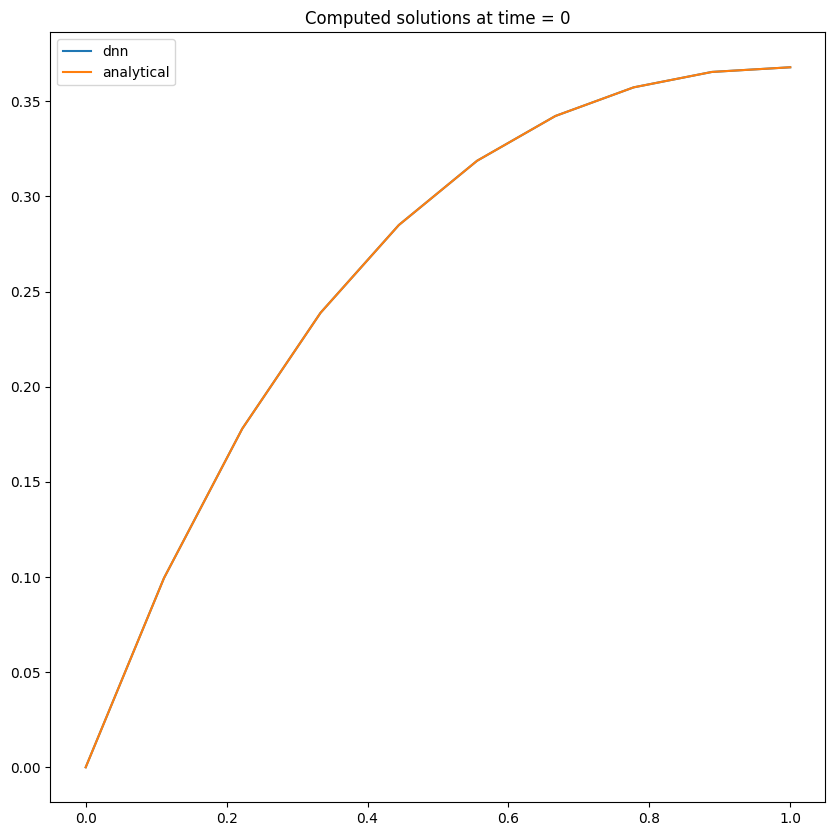

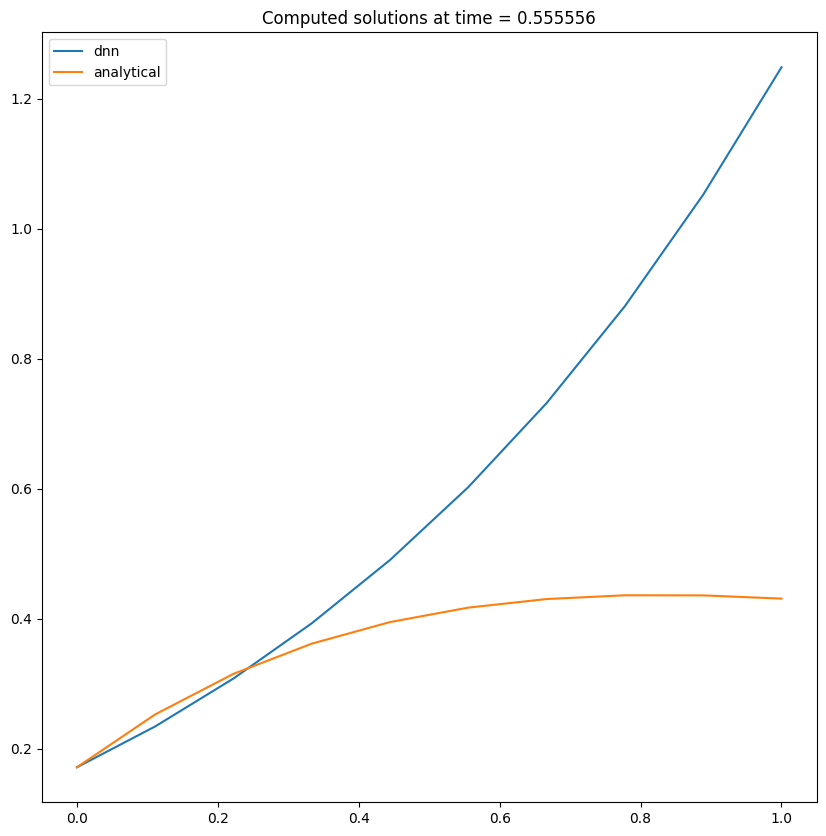

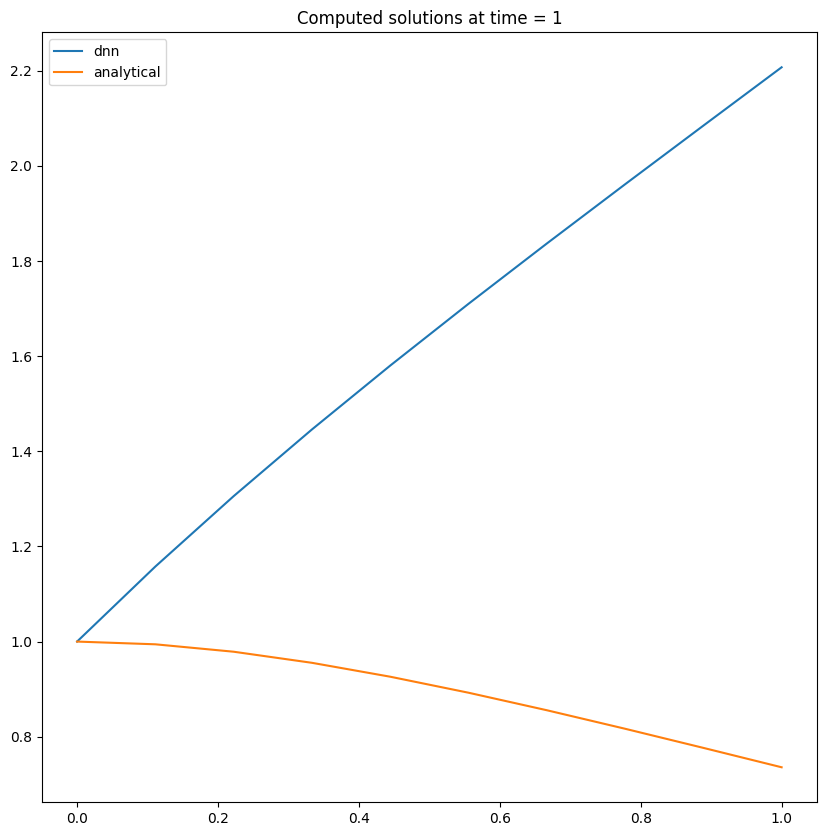

In [ ]:
import autograd.numpy as np
from autograd import jacobian,hessian,grad
import autograd.numpy.random as npr
from matplotlib import cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

## Set up the network

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def deep_neural_network(deep_params, x):
    # x is now a point and a 1D numpy array; make it a column vector
    num_coordinates = np.size(x,0)
    x = x.reshape(num_coordinates,-1)

    num_points = np.size(x,1)

    # N_hidden is the number of hidden layers
    N_hidden = len(deep_params) - 1 # -1 since params consist of parameters to all the hidden layers AND the output layer

    # Assume that the input layer does nothing to the input x
    x_input = x
    x_prev = x_input

    ## Hidden layers:

    for l in range(N_hidden):
        # From the list of parameters P; find the correct weigths and bias for this layer
        w_hidden = deep_params[l]

        # Add a row of ones to include bias
        x_prev = np.concatenate((np.ones((1,num_points)), x_prev ), axis = 0)

        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)

        # Update x_prev such that next layer can use the output from this layer
        x_prev = x_hidden

    ## Output layer:

    # Get the weights and bias for this layer
    w_output = deep_params[-1]

    # Include bias:
    x_prev = np.concatenate((np.ones((1,num_points)), x_prev), axis = 0)

    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output[0][0]

## Define the trial solution and cost function
def u(x,y):
    return (1-x)* y**3 + x*(1+y**3)*np.exp(-1) + (1-y)* x *(np.exp(-x) - np.exp(-1)) + y*((1+x)*np.exp(-x) - (1-x-2*x*np.exp(-1)))

def g_trial(point,P):
    x,y = point
    return u(x,y) + x*(1-x)*y*(1-y)*deep_neural_network(P,point)

# The right side of the ODE:
def f(point):
    return 0.

# The cost function:
def cost_function(P, x, y):
    cost_sum = 0

    g_y_jacobian_func = jacobian(g_trial)
    g_y_hessian_func = hessian(g_trial)

    for x_ in x:
        for t_ in y:
            point = np.array([x_,t_])

            g_y = g_trial(point,P)
            g_y_jacobian = g_y_jacobian_func(point,P)
            g_y_hessian = g_y_hessian_func(point,P)

            g_y_dy = g_y_jacobian[1]
            g_y_d2x = g_y_hessian[0][0]

            func = f(point)

            err_sqr = ( (g_y_dy - g_y_d2x) - func)**2
            cost_sum += err_sqr

    return cost_sum /( np.size(x)*np.size(y) )

## For comparison, define the analytical solution
def g_analytic(point):
    x,y = point
    return np.exp(-x)*(x+(y**3))

## Set up a function for training the network to solve for the equation
def solve_pde_deep_neural_network(x,y, num_neurons, num_iter, lmb):
    ## Set up initial weigths and biases
    N_hidden = np.size(num_neurons)

    ## Set up initial weigths and biases

    # Initialize the list of parameters:
    P = [None]*(N_hidden + 1) # + 1 to include the output layer

    P[0] = npr.randn(num_neurons[0], 2 + 1 ) # 2 since we have two points, +1 to include bias
    for l in range(1,N_hidden):
        P[l] = npr.randn(num_neurons[l], num_neurons[l-1] + 1) # +1 to include bias

    # For the output layer
    P[-1] = npr.randn(1, num_neurons[-1] + 1 ) # +1 since bias is included

    print('Initial cost: ',cost_function(P, x, y))

    cost_function_grad = grad(cost_function,0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        cost_grad =  cost_function_grad(P, x , y)

        for l in range(N_hidden+1):
            P[l] = P[l] - lmb * cost_grad[l]
        if i%50 == 0:
            print(f"Completed {i} iterations.")
            print(f"Loss: {cost_function(P, x , y)}")
    print('Final cost: ',cost_function(P, x, y))

    return P

if __name__ == '__main__':
    ### Use the neural network:
    npr.seed(15)

    ## Decide the vales of arguments to the function to solve
    Nx = 10; Ny = 10
    x = np.linspace(0, 1, Nx)
    y = np.linspace(0,1,Ny)

    ## Set up the parameters for the network
    num_hidden_neurons = [32, 32]
    num_iter = 100
    lmb = 0.01

    P = solve_pde_deep_neural_network(x,y, num_hidden_neurons, num_iter, lmb)

    ## Store the results
    g_dnn_ag = np.zeros((Nx, Ny))
    G_analytical = np.zeros((Nx, Ny))
    for i,x_ in enumerate(x):
        for j, t_ in enumerate(y):
            point = np.array([x_, t_])
            g_dnn_ag[i,j] = g_trial(point,P)

            G_analytical[i,j] = g_analytic(point)

    # Find the map difference between the analytical and the computed solution
    diff_ag = np.abs(g_dnn_ag - G_analytical)
    print('Max absolute difference between the analytical solution and the network: %g'%np.max(diff_ag))

    ## Plot the solutions in two dimensions, that being in position and time

    T,X = np.meshgrid(y,x)

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection='3d')
    ax.set_title('Solution from the deep neural network w/ %d layer'%len(num_hidden_neurons))
    s = ax.plot_surface(T,X,g_dnn_ag,linewidth=0,antialiased=False,cmap=cm.viridis)
    ax.set_xlabel('Time $y$')
    ax.set_ylabel('Position $x$');


    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection='3d')
    ax.set_title('Analytical solution')
    s = ax.plot_surface(T,X,G_analytical,linewidth=0,antialiased=False,cmap=cm.viridis)
    ax.set_xlabel('Time $y$')
    ax.set_ylabel('Position $x$');

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection='3d')
    ax.set_title('Difference')
    s = ax.plot_surface(T,X,diff_ag,linewidth=0,antialiased=False,cmap=cm.viridis)
    ax.set_xlabel('Time $y$')
    ax.set_ylabel('Position $x$');

    ## Take some slices of the 3D plots just to see the solutions at particular times
    indx1 = 0
    indx2 = int(Ny/2)
    indx3 = Ny-1

    t1 = y[indx1]
    t2 = y[indx2]
    t3 = y[indx3]

    # Slice the results from the DNN
    res1 = g_dnn_ag[:,indx1]
    res2 = g_dnn_ag[:,indx2]
    res3 = g_dnn_ag[:,indx3]

    # Slice the analytical results
    res_analytical1 = G_analytical[:,indx1]
    res_analytical2 = G_analytical[:,indx2]
    res_analytical3 = G_analytical[:,indx3]

    # Plot the slices
    plt.figure(figsize=(10,10))
    plt.title("Computed solutions at time = %g"%t1)
    plt.plot(x, res1)
    plt.plot(x,res_analytical1)
    plt.legend(['dnn','analytical'])

    plt.figure(figsize=(10,10))
    plt.title("Computed solutions at time = %g"%t2)
    plt.plot(x, res2)
    plt.plot(x,res_analytical2)
    plt.legend(['dnn','analytical'])

    plt.figure(figsize=(10,10))
    plt.title("Computed solutions at time = %g"%t3)
    plt.plot(x, res3)
    plt.plot(x,res_analytical3)
    plt.legend(['dnn','analytical'])

    plt.show()